# Initial Proposal
Initial proposal for CS5963 final project. See the [project page](http://datasciencecourse.net/2016/project/) for more information.

## Basic Info
Title: Predicting Student Alcohol Consumption

Group Members:

Elizabeth Armstrong  
elizabeth.armstrong@chemeng.utah.edu  
u0726588  

Nipun Gunawardena  
1.nipun@gmail.com  
u0624269  

Karen DeMille   
karen.demille@utah.edu   
u0787257    

## Background and Motivation
As recommended in class, our first goal was to find a dataset that was easily accessible but interesting. In the UCI Machine Learning Repository, we found a dataset describing high school student alcohol consumption. This is a potentially interesting dataset for several reasons. Underage drinking is a health problem, and understanding it better can lead to better treatment. As an alternate conclusion, rehabilitation efforts can be better focused if drinking isn't a large problem. Additionally, it would be interesting to see how alcohol consumption correlates with socioeconomic and educational factors. Finally, it would be very informative if we could find another dataset to compare with. If student alcohol consumption correlates well with general population alcohol consumption, future health problems can be prevented.

All the members of our group are engineers. While this topic doesn't really relate to any of our research topics, this project gives us the opportunity to work with human-oriented data, something that is sometimes lacking in our field. Ultimately, determining what factors lead to alcohol consumption can help policymakers come to better decisions.

## Project Objectives
This project will have two main objectives: General data exploration and alcoholism tendency prediction. General data exploration will let us find factors that are important to alcohol consumption in students, and any other interesting information. Developing a tool to predict alcohol consumption will be a proof of concept that could be used by future institutions. These objectives can be completed with the current tools and data we have access to. However, if we can find or gather more alcohol consumption data, we would like to also see how the existing dataset matches the new one. This extra data can also be used to test our predictive tool. Since our dataset is already quite clean, we are planning on spending most of our time on analysis, though this might change if we find a new dataset to work with. 

## Data

We plan to use the data folder for the Student Alcohol Consumption Data Set from the UCI Machine Learning Repository. This webpage can be accessed at http://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION. Datasets for attributes of high school students in a math course and a Portuguese language course can be downloaded as CSV files, which are part of a compressed folder accessed through the Data Folder link or directly from http://archive.ics.uci.edu/ml/machine-learning-databases/00356/. This data has been downloaded and included in the same folder as the Jupyter notebook to allow for easy access and importing. The file is read and printed below using pandas. The data attributes are separated by semicolons, making “;” the delimiter.

With permission, we would also like to create a survey for University of Utah students that collects some data on similar topics to the attributes in the student dataset from the UCI dataset. We would then hope to see where our class fits in to the model we will be creating for predicting alcohol consumption based on other traits. These attributes include sex, age, home to school travel time, weekly study time, extra-curricular activities, workday alcohol consumption, and weekend alcohol consumption to name a few. There are 33 total attributes recorded in the UCI data sets to choose from. A full list and description of attributes included can be found on the website.

In [1]:
import pandas as pd
mathclass = pd.read_csv("student-mat.csv",delimiter=";") #math course csv
portclass = pd.read_csv("student-por.csv",delimiter=";") #portuguese language course csv

portclass.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [2]:
mathclass.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
mathclass.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [4]:
portclass.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


# Data Processing

The data description from the website states there are no missing values from the dataset. Therefore we do not expect to do substantial data cleanup. However, most of the data entries are strings, so will have to be converted to an integer value for processing. Many are binary ‘yes’ or ‘no’ answers, but some have more than two choices such as the father or mother’s job being ‘teacher’, ‘health’ care related, civil ‘services’, ‘at_home’, or ‘other.’ Since there are 33 different attributes considered, we may want to ignore some before converting strings to associated integer values, or we could change all the entries into numerical values and start will a model using all attributes to try to predict alcohol consumption. In the sense of obtaining enough data for analysis, we will not need a lot of data extraction since the two CSV files with data are provided for download. This data will just have to be manipulated in such a way as to make it useful for creating a prediction model.

There are 395 entries for the math course data set and 649 entries for the Portuguese language dataset, giving a total of 1044 data entries. These datasets could be combined into one large set for analysis since the number of different attributes considered are the same for each course. There are several (382) students that belong to both datasets. When we combine both datasets, we will make sure that entries aren't duplicated.

The student data ranks alcohol consumption on weekdays and weekends from 1 (very low) to 5 (very high). We will be attempting to create an accurate model for predicting a student’s alcohol consumption levels for weekdays and weekends based on other attributes of that student. So the quantities derived will include the model parameters for different modeling methods that give the highest accuracy of prediction and the relationship of alcohol consumption ranging from 1 to 5 based on the numerical associations assigned to attributes. We also hope to be able to try using the model for predicting our class data to see where our student population might fit in with the student population in the dataset.

Data processing will include reassigning strings with numerical values, concatenating datasets for two different student populations (math course and Portuguese language course), and performing various modeling and visualization techniques. The model with the highest accuracy can then be used to try to predict our class alcohol consumption frequencies, and be compared with data obtained through a survey, tying in a University of Utah student population for the Intro to Data Science class, to see how accurately the model can be extended to a population outside the dataset locations. The methods for modeling and visualizing are discussed in the following sections.

## Exploratory Analysis

To look at the previously discussed dataset, we will use several visualization techniques and analysis methods.  Since the dataset contains many attributes, we will use a scatterplot matrix with a portion of the attributes to show which attributes appear to have strong correlations with each other.  We will also use normal distribution curves to compare the distributions of attributes from the two course datasets.  By comparing the normal distribution of an attribute to the normal distribution of the same attribute from the other course dataset, we can understand how statisically similar the two samples of students are.  It would also be nice to create a visualization to demonstrate the socioeconomic factors of the students who were included in the dataset.

A method that we will use to look at our data will be basic statistical calculations, including maximum, minimum, average, median, and standard deviation values.  Some of these values will be used in creating normal distributions for selected attributes.  A correlation matrix will also be used to help determine which attributes can best preduct alcohol consumption practices.

A basic step in analyzing the alcohol consumption data is to perform a statistical analysis on the weekday alcohol consumption and weekend alcohol consumption data for the Portuguese language course and the math course.  This would involve finding the maximum, minimum, mean, and median values for alcohol consumption.  Normal distributions representing the data can be constructed.  The normal distributions and hypothesis testing can be used to determine whether the weekday and weekend drinking practices of the students are statistically different from each other.  Furthermore, whether or not the alcohol consumption practices of the two classes are statistically different from each other can also be determined.

In [5]:
#Find basic statistical data of alcohol consumption
print('Alcohol consumption rankings: 1=very low to 5=very high \n')
print('Portuguese language course')
print('Minimum weekday: {} \t Minimum weekend: {}'.format(portclass['Dalc'].min(),portclass['Walc'].min()))
print('Maximum weekday: {} \t Maximum weekend: {}'.format(portclass['Dalc'].max(),portclass['Walc'].max()))
print('Median weekday: {} \t Median weekend: {}'.format(portclass['Dalc'].median(),portclass['Walc'].median()))
print('Mean weekday: {:0.2f} \t Mean weekend: {:0.2f}'.format(portclass['Dalc'].mean(),portclass['Walc'].mean()))
print('\n')
print('Math course')
print('Minimum weekday: {} \t Minimum weekend: {}'.format(mathclass['Dalc'].min(),mathclass['Walc'].min()))
print('Maximum weekday: {} \t Maximum weekend: {}'.format(mathclass['Dalc'].max(),mathclass['Walc'].max()))
print('Median weekday: {} \t Median weekend: {}'.format(mathclass['Dalc'].median(),mathclass['Walc'].median()))
print('Mean weekday: {:0.2f} \t Mean weekend: {:0.2f}'.format(mathclass['Dalc'].mean(),mathclass['Walc'].mean()))

Alcohol consumption rankings: 1=very low to 5=very high 

Portuguese language course
Minimum weekday: 1 	 Minimum weekend: 1
Maximum weekday: 5 	 Maximum weekend: 5
Median weekday: 1.0 	 Median weekend: 2.0
Mean weekday: 1.50 	 Mean weekend: 2.28


Math course
Minimum weekday: 1 	 Minimum weekend: 1
Maximum weekday: 5 	 Maximum weekend: 5
Median weekday: 1.0 	 Median weekend: 2.0
Mean weekday: 1.48 	 Mean weekend: 2.29


In [6]:
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

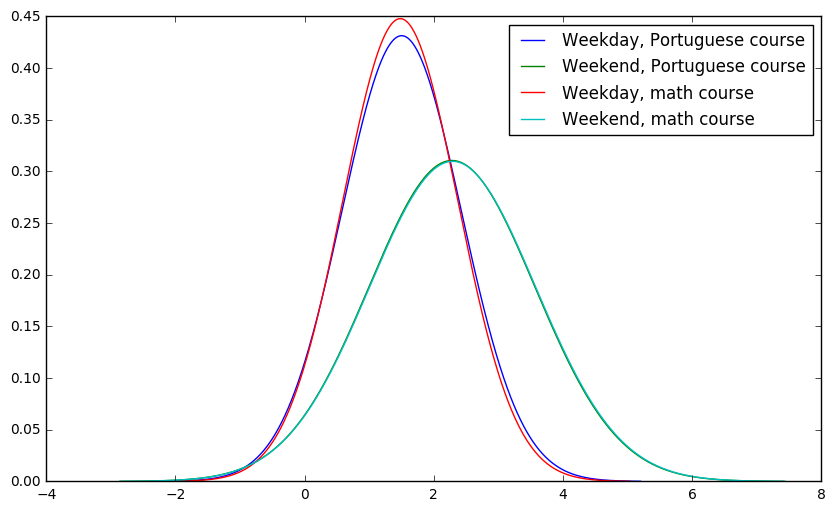

In [7]:
#Plot normal distributions of alcohol consumption for each course
#Portuguese course
mean_wd_p = portclass['Dalc'].mean()
mean_we_p = portclass['Walc'].mean()
std_wd_p = portclass['Dalc'].std()
std_we_p = portclass['Walc'].std()
#Math course
mean_wd_m = mathclass['Dalc'].mean()
mean_we_m = mathclass['Walc'].mean()
std_wd_m = mathclass['Dalc'].std()
std_we_m = mathclass['Walc'].std()

x_wd_p = scipy.arange(mean_wd_p-4*std_wd_p,mean_wd_p+4*std_wd_p,0.001)
dist_wd_p = norm.pdf(x_wd_p, loc=mean_wd_p, scale=std_wd_p)
plt.plot(x_wd_p,dist_wd_p,label='Weekday, Portuguese course')

x_we_p = scipy.arange(mean_we_p-4*std_we_p,mean_we_p+4*std_we_p,0.001)
dist_we_p = norm.pdf(x_we_p, loc=mean_we_p, scale=std_we_p)
plt.plot(x_we_p,dist_we_p,label='Weekend, Portuguese course')

x_wd_m = scipy.arange(mean_wd_m-4*std_wd_m,mean_wd_m+4*std_wd_m,0.001)
dist_wd_m = norm.pdf(x_wd_m, loc=mean_wd_m, scale=std_wd_m)
plt.plot(x_wd_m,dist_wd_m,label='Weekday, math course')

x_we_m = scipy.arange(mean_we_m-4*std_we_m,mean_we_m+4*std_we_m,0.001)
dist_we_m = norm.pdf(x_we_m, loc=mean_we_m, scale=std_we_m)
plt.plot(x_we_m,dist_we_m,label='Weekend, math course')

plt.legend(loc='best')
plt.show()
#SOURCE: https://github.com/datascience-course/2016-datascience-labs/tree/master/lecture3-hypothesis-testing

From the normal distribution plots, it can be seen that each of the courses has similar alcohol consumption practices on both the weekdays and the weekends.  The two weekend distributions lie nearly on top of each other, suggesting that there is no statistical difference between the alcohol consumption practices of the students in the Portuguese and math courses.  Similarly, the weekday distributions demonstrate almost as much overlap as the weekend distributions, supporting the hypothesis that there is no statistical difference between the alcohol consumption practices of the students in the Portuguese and math courses.  We will formally conclude whether there is a statistical difference in the alcohol consumption practices of the students in the Portuguese and math courses with a hypothesis test.

Additionally, the distribution plots show that students tend to consume more alcohol on the weekends than on weekdays.  The larger spread in weekend alcohol consumption may suggest that not all students actually consume more alcohol on weekends than they do on weekdays.

In addition to exploring the alcohol consumption practices of the students, we will explore the attributes describing the socioeconomic status of the students.  The process of exploring the attributes will be very similar to the process used above to explore the distribution of alcohol consumption practices.  The study of the students' attributes will allow us to gain an understanding of the socioeconomic backgrounds of the people who were included in the study.

By learning what types of people are included in our dataset, we can understand the limitations of models created from the data and the applications of conclusions reached from the data.  For example, the dataset considers students from ages 15 to 22.  Thus, this a model derived from this dataset may or may not properly represent the alcohol consumption of people outside of the ages included in our dataset.

## Analysis Methodology

To analyze our data, we will use two major methods.  The first method will be regression.  The second method will be classification.  The reason for using regression and classification to analyze the data is that we have a labeled dataset.  The attributes used to predict the labels in the dataset are either already numerical values or can have numerical values assigned.  

Multilinear regression will be used to create a model that incorporates the attributes of the students that best correlate to alcohol consumption.  This model will use quantified versions of attributes to predict a decimal value that represents the alcohol consumption of the person.  However, to validate the model, the predicted decimal value describing alcohol consumption cannot be directly compared to the known integer value describing alcohol consumption.  In order to create an integer value from the predicted decimal value from the model, we will have to either round or truncate the decimal values.  To determine attributes that best correlate with alcohol consumption, it may be nice to use primary component analysis (PCA).

Classification will also be used to model alcohol consumption.  Three possible classification methods will be considered as a potential model.  These methods are SVM, k-nearest neighbors, and decision trees.  From the three methods, we will find which one results in the best prediction model.  These classification models will directly predict an integer value for alcohol consumption, unlike the regression discussed previously.  It may be nice to combine the results of multiple classification models in a vote or calculation which predicts a final alcohol consumption value.  

As new topics are covered in lectures, further analysis methods may be found to be useful for analyzing the alcohol consumption dataset.

## Project Schedule
* November 4 - Finish cleaning data
* November 18 - Finish data exploration. Get survey sent out on 18th if allowed.
* November 18 - First project milestone
* December 2 - Finish predictive models. Incorporate data from survey
* December 2 - Submission
* December 5/7 - Presentation